In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy
import psycopg2
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect


In [100]:
#Connecting to Database
user = 'postgres'
password = 'password'
host = 'localhost'
port = 5432
database = 'MarchMadness2'


path= f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(path)

conn = engine.connect()

In [25]:
tables = inspector.get_table_names()
tables

['team', 'player', 'coaches', 'tvschedule']

In [99]:
inspector = inspect(engine)

tables = inspector.get_table_names()
tables
# reflect the tables
for table in tables:
    columns = inspector.get_columns(table)
    print(table)
    print()
    for column in columns:
        print(column["name"], column["type"])
     
    display(pd.DataFrame(columns))
    
    print()

team

team_id INTEGER
team VARCHAR(30)
abrev VARCHAR(30)
fg DOUBLE_PRECISION
three_pm DOUBLE_PRECISION
ft DOUBLE_PRECISION
ppg DOUBLE_PRECISION
coach_id INTEGER
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,team_id,INTEGER,False,None,False,None
1,team,VARCHAR(30),False,None,False,None
2,abrev,VARCHAR(30),False,None,False,None
3,fg,DOUBLE_PRECISION,False,None,False,None
4,three_pm,DOUBLE_PRECISION,False,None,False,None
5,ft,DOUBLE_PRECISION,False,None,False,None
6,ppg,DOUBLE_PRECISION,False,None,False,None
7,coach_id,INTEGER,True,None,False,None
8,last_updated,TIMESTAMP,True,LOCALTIMESTAMP,False,None



player

player_id INTEGER
team_id INTEGER
player VARCHAR(30)
firstname VARCHAR(30)
lastname VARCHAR(30)
ppg DOUBLE_PRECISION
apg DOUBLE_PRECISION
rpg DOUBLE_PRECISION
spg DOUBLE_PRECISION
three_point DOUBLE_PRECISION
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,player_id,INTEGER,False,None,False,None
1,team_id,INTEGER,True,None,False,None
2,player,VARCHAR(30),False,None,False,None
3,firstname,VARCHAR(30),False,None,False,None
4,lastname,VARCHAR(30),False,None,False,None
5,ppg,DOUBLE_PRECISION,False,None,False,None
6,apg,DOUBLE_PRECISION,False,None,False,None
7,rpg,DOUBLE_PRECISION,False,None,False,None
8,spg,DOUBLE_PRECISION,False,None,False,None
9,three_point,DOUBLE_PRECISION,False,None,False,None



coaches

coach_id INTEGER
firstname VARCHAR(30)
lastname VARCHAR(30)
mascot VARCHAR(30)
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,coach_id,INTEGER,False,None,False,None
1,firstname,VARCHAR(30),False,None,False,None
2,lastname,VARCHAR(30),False,None,False,None
3,mascot,VARCHAR(30),False,None,False,None
4,last_updated,TIMESTAMP,True,LOCALTIMESTAMP,False,None



tvschedule

schedule_id INTEGER
round VARCHAR(30)
dates VARCHAR(30)
team_id_1 INTEGER
team_id_2 INTEGER
time_et TIME
tv_network VARCHAR(30)
city VARCHAR(30)
venue VARCHAR(30)
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,schedule_id,INTEGER,False,None,False,None
1,round,VARCHAR(30),False,None,False,None
2,dates,VARCHAR(30),False,None,False,None
3,team_id_1,INTEGER,False,None,False,None
4,team_id_2,INTEGER,False,None,False,None
5,time_et,TIME,False,None,False,None
6,tv_network,VARCHAR(30),False,None,False,None
7,city,VARCHAR(30),False,None,False,None
8,venue,VARCHAR(30),True,None,False,None
9,last_updated,TIMESTAMP,True,LOCALTIMESTAMP,False,None


### Top 10 Teams with Top Points per Game

In [121]:
query = """
        select
        te.team as TeamName,
        pl.firstname as PlayerFirstname,
        pl.lastname as PlayerLastname, 
        pl.ppg
        from player pl
        join team te on te.team_id = pl.team_id
        where te.team_id <= 10
        Order by te.team_id asc, pl.ppg desc;
        """

topTeams = pd.read_sql(query, conn)

topTeams

,teamname,playerfirstname,playerlastname,ppg
0,Gonzaga,Drew,Timme,28.5
1,Gonzaga,Andrew,Nembhard,16.0
2,Gonzaga,Chet,Holmgren,14.0
3,Gonzaga,Rasir,Bolton,13.5
4,Gonzaga,Anton,Watson,5.0
...,...,...,...,...
61,Villanova,Jermaine,Samuels,16.0
62,Villanova,Justin,Moore,14.5
63,Villanova,Eric,Dixon,12.5
64,Villanova,Caleb,Daniels,12.0


In [122]:
bars = topTeams.groupby('teamname')['ppg'].sum().sort_values(ascending=False)
bars
# grph = bars.plot.bar(color = 'skyblue', title = 'Timepoints per Drug Regimen', ylabel = 'Timepoints', figsize=(15,5), rot=0, ylim=(0, 250))
# grph.title.set_size(20)

teamname
Arizona       85.5
Gonzaga       83.5
Baylor        82.0
Kentucky      79.0
Villanova     73.5
Kansas        73.0
Purdue        71.5
Tennessee     62.0
UCLA          61.0
Texas Tech    58.5
Name: ppg, dtype: float64

In [51]:
color_dict = dict({'Gonzaga':'#041E42',
                  'Arizona':'#CC0033',
                  'Kansas':'#0051BA',
                  'Purdue':'#CEB888',
                  'UCLA':'#2D68C4',
                  'Tennessee':'#4F2984',
                  'Kentucky':'#0033A0',
                  'Texas Tech':'#CC0000',
                  'Baylor':'#154734',
                  'Villanova':'#00205B',})


C:\Users\yvargas\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


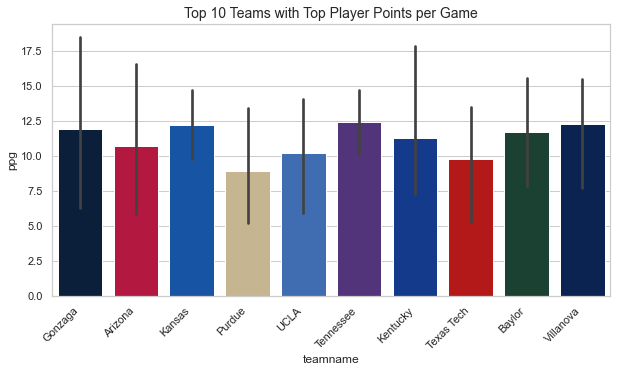

In [126]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
chart=sns.barplot(topTeams.teamname, topTeams.ppg, palette = color_dict)
sns.color_palette("mako", as_cmap=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Top 10 Teams with Top Player Points per Game', size=14)
plt.show
plt.savefig("topTeams.png")

### Top Performing Players & Assist Category

In [127]:
query = """
       select
        pl.player as names1, 
        pl.apg,
        team.team
        from player pl
        join team on team.team_id = pl.team_id
        where pl.apg > 7
        Order by pl.apg desc;
                """

topAssist = pd.read_sql(query, conn)

topAssist

,names1,apg,team
0,Tyler Kolek,10.0,Marquette
1,R.J. Davis,9.0,North Carolina
2,J.D. Davison,9.0,Alabama
3,Andrew Nembhard,8.0,Gonzaga
4,Marcus Carr,8.0,Texas
5,Isaiah Mobley,8.0,USC
6,James Akinjo,7.5,Baylor


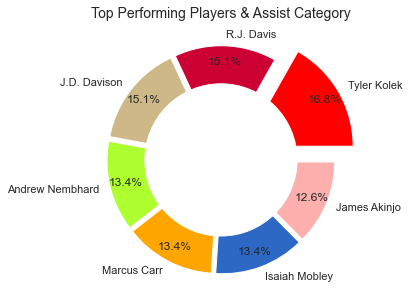

<Figure size 432x288 with 0 Axes>

In [129]:
# colors
colors = ['#FF0000', '#CC0033', '#CEB888', 
          '#ADFF2F', '#FFA500','#2D68C4',"#fcafac" ]
# explosion
explode = (0.25, 0.05, 0.05, 0.05, 0.05,0.05,0.05)
#chart size
plt.figure(figsize=(10,5))  
# Pie Chart
plt.pie(topAssist.apg, colors=colors, labels=topAssist.names1,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title("Top Performing Players & Assist Category", size=14)

# Displaying donut Chart
plt.show()
plt.savefig("topAssist.png")

### Average Total Game Score by Time & Network

In [71]:
query = """
            Select  
            tv. dates,
            tv.time_et, 
            tv.tv_network,
            case when
                tv.time_et between '19:00:00' and '24:00:00'  then 'Night'
                else 'Day'
            End as gametime,
            t1.ppg as ppg1,
            t2.ppg as ppg2
            
            from tvschedule tv
            Join team t1 on t1.team_id = tv.team_id_1
            Join team t2 on t2.team_id = tv.team_id_2
            
            where dates Like 'Sat%%'
            
            order by time_et desc;
            """
gametime = pd.read_sql(query, conn)
gametime

,dates,time_et,tv_network,gametime,ppg1,ppg2
0,"Saturday, March 19",21:40:00,TBS,Night,93.0,64.0
1,"Saturday, March 19",20:40:00,TNT,Night,75.0,70.0
2,"Saturday, March 19",19:45:00,CBS,Night,92.0,85.0
3,"Saturday, March 19",19:10:00,TBS,Night,57.0,82.0
4,"Saturday, March 19",18:10:00,TNT,Day,66.0,67.0
5,"Saturday, March 19",17:15:00,CBS,Day,88.0,75.0
6,"Saturday, March 19",14:40:00,CBS,Day,83.0,72.0
7,"Saturday, March 19",12:10:00,CBS,Day,95.0,85.0


In [81]:
sum_column = gametime.ppg1 + gametime.ppg2
gametime['sum'] = sum_column
gametime

,dates,time_et,tv_network,gametime,ppg1,ppg2,sum
0,"Saturday, March 19",21:40:00,TBS,Night,93.0,64.0,157.0
1,"Saturday, March 19",20:40:00,TNT,Night,75.0,70.0,145.0
2,"Saturday, March 19",19:45:00,CBS,Night,92.0,85.0,177.0
3,"Saturday, March 19",19:10:00,TBS,Night,57.0,82.0,139.0
4,"Saturday, March 19",18:10:00,TNT,Day,66.0,67.0,133.0
5,"Saturday, March 19",17:15:00,CBS,Day,88.0,75.0,163.0
6,"Saturday, March 19",14:40:00,CBS,Day,83.0,72.0,155.0
7,"Saturday, March 19",12:10:00,CBS,Day,95.0,85.0,180.0


<Figure size 720x360 with 0 Axes>

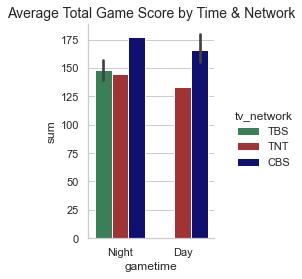

<Figure size 432x288 with 0 Axes>

In [103]:
plt.figure(figsize=(10,5))
g = sns.catplot(x="gametime", y="sum",
               hue="tv_network",
                col="dates",
                data=gametime, kind="bar",
                height=4, aspect=.7, palette = ['seagreen', 'firebrick', 'navy']);
                
plt.title('Average Total Game Score by Time & Network', size=14)
plt.show()
plt.savefig("avgGameScore.png")

### Top 5 Coaches based past metrics as Players

In [132]:
query = """
            select 
co.coach_id as CoachPlayerRank,
co.firstname as CoachFirstName,
co.lastname as CoachLastName,
te.team as TeamName,
te.team_id as TeamRanks

from 
team te
join coaches co on co.coach_id = te.coach_id
where co.coach_id < 6
Order by co.coach_id asc;
            """
TopCoaches = pd.read_sql(query, conn)
TopCoaches

,coachplayerrank,coachfirstname,coachlastname,teamname,teamranks
0,1,Penny,Hardaway,Memphis,20
1,2,Juwan,Howard,Michigan,35
2,3,Mike,Woodson,Indiana,31
3,4,Hubert,Davis,North Carolina,28
4,5,Shaheen,Holloway,Saint Peter's,57


In [133]:
conn.close()

In [136]:
engine.dispose()